In [353]:
from sklearn.externals import joblib
import pandas as pd
from sklearn.metrics import r2_score
from sklearn import linear_model
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import nltk

from wordcloud import WordCloud, STOPWORDS
init_df = pd.read_csv('/Users/yiyangzhang/CS@Northeastern University/CS7180_AI/Wine-review-Project-master/wine-reviews_data/winemag-data-130k-v2.csv', na_values="?")
init_df.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


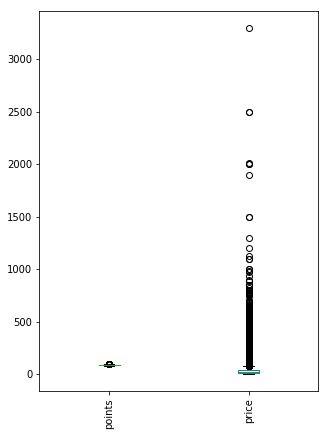

In [354]:
init_df.boxplot(['points', 'price'], rot=90, figsize=(5,7), grid=False)

In [355]:
## remove outliear
df = init_df.where(init_df['price'] < 1500)


## I drop these columns because some of them looks unrelated to final results(Unnamed: 0, taster_twitter_handle,designation), the others have 
## too many values(more than 1000 or 10000) so it is impossible to show them to users. What's more. I also tried to involve these values into
## my model and found they have very slight affect to my model's performance. So I just drop them
df = df.drop(['Unnamed: 0','description','taster_twitter_handle','title','region_1', 'region_2','designation','variety','winery'],1)
df = df.dropna()
df.head()

,country,points,price,province,taster_name
1,Portugal,87.0,15.0,Douro,Roger Voss
2,US,87.0,14.0,Oregon,Paul Gregutt
3,US,87.0,13.0,Michigan,Alexander Peartree
4,US,87.0,65.0,Oregon,Paul Gregutt
5,Spain,87.0,15.0,Northern Spain,Michael Schachner


In [356]:
# use the LabelEncoder function to convert the country to corresponding integers.
le_country = LabelEncoder()
le_country.fit(df['country'])
df['country']= le_country.transform(df['country'])
# le_country_mapping = dict(zip(le_country.classes_, le_country.transform(le_country.classes_)))
# print(le_country_mapping)
df.head()

,country,points,price,province,taster_name
1,30,87.0,15.0,Douro,Roger Voss
2,39,87.0,14.0,Oregon,Paul Gregutt
3,39,87.0,13.0,Michigan,Alexander Peartree
4,39,87.0,65.0,Oregon,Paul Gregutt
5,36,87.0,15.0,Northern Spain,Michael Schachner


In [357]:
# use the LabelEncoder function to convert the province to corresponding integers.
le_province = LabelEncoder()
le_province.fit(df['province'])
df['province']= le_province.transform(df['province'])
# le_province_mapping = dict(zip(le_country.classes_, le_country.transform(le_country.classes_)))
# print(le_name_mapping)
df.head()

,country,points,price,province,taster_name
1,30,87.0,15.0,105,Roger Voss
2,39,87.0,14.0,263,Paul Gregutt
3,39,87.0,13.0,213,Alexander Peartree
4,39,87.0,65.0,263,Paul Gregutt
5,36,87.0,15.0,257,Michael Schachner


In [358]:
# use the LabelEncoder function to convert the taster_name to corresponding integers.
le_taster_name = LabelEncoder()
le_taster_name.fit(df['taster_name'])
df['taster_name']= le_taster_name.transform(df['taster_name'])
# le_province_mapping = dict(zip(le_country.classes_, le_country.transform(le_country.classes_)))
# print(le_name_mapping)
df.head()

,country,points,price,province,taster_name
1,30,87.0,15.0,105,15
2,39,87.0,14.0,263,14
3,39,87.0,13.0,213,0
4,39,87.0,65.0,263,14
5,36,87.0,15.0,257,12


### 1. Predict price with regression

In [359]:
X = df.drop(["price"], axis=1)
# Extract the target feature
y = df['price']
seed = 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=seed)

In [360]:
regr_linear = linear_model.LinearRegression()
regr_linear.fit(X_train, y_train)
print ("R^2 for linear regression is")
regr_linear.score(X_test,y_test)

R^2 for linear regression is


0.20709502389867251

using polynomial regression

In [361]:
poly_reg_2 = PolynomialFeatures(degree = 2)
X_poly_2 = poly_reg_2.fit_transform(X_train)
lin_reg_2 = linear_model.LinearRegression()
lin_reg_2.fit(X_poly_2, y_train)
print ("R^2 for polynomial regression(degree = 2) is")
lin_reg_2.score(poly_reg_2.fit_transform(X_test),y_test)

R^2 for polynomial regression(degree = 2) is


0.3113010603222708

In [362]:
poly_reg_3 = PolynomialFeatures(degree = 3)
X_poly_3 = poly_reg_3.fit_transform(X_train)
lin_reg_3 = linear_model.LinearRegression()
lin_reg_3.fit(X_poly_3, y_train)
print ("R^2 for polynomial regression(degree = 3) is")
lin_reg_3.score(poly_reg_3.fit_transform(X_test),y_test)

R^2 for polynomial regression(degree = 3) is


0.3673725401874456

In [363]:
poly_reg_4 = PolynomialFeatures(degree = 4)
X_poly_4 = poly_reg_4.fit_transform(X_train)
lin_reg_4 = linear_model.LinearRegression()
lin_reg_4.fit(X_poly_4, y_train)
print ("R^2 for polynomial regression(degree = 4) is")
lin_reg_4.score(poly_reg_4.fit_transform(X_test),y_test)

R^2 for polynomial regression(degree = 4) is


0.3934342388933691

In [364]:
poly_reg_5 = PolynomialFeatures(degree = 5)
X_poly_5 = poly_reg_5.fit_transform(X_train)
lin_reg_5 = linear_model.LinearRegression()
lin_reg_5.fit(X_poly_5, y_train)
print ("R^2 for polynomial regression(degree = 5) is")
lin_reg_5.score(poly_reg_5.fit_transform(X_test),y_test)

R^2 for polynomial regression(degree = 5) is


0.40455817121773

In [365]:
poly_reg_6 = PolynomialFeatures(degree = 6)
X_poly_6 = poly_reg_6.fit_transform(X_train)
lin_reg_6 = linear_model.LinearRegression()
lin_reg_6.fit(X_poly_6, y_train)
print ("R^2 for polynomial regression(degree = 6) is")
lin_reg_6.score(poly_reg_6.fit_transform(X_test),y_test)

R^2 for polynomial regression(degree = 6) is


0.4094690828475262

In [366]:
poly_reg_7 = PolynomialFeatures(degree = 7)
X_poly_7 = poly_reg_7.fit_transform(X_train)
lin_reg_7 = linear_model.LinearRegression()
lin_reg_7.fit(X_poly_7, y_train)
print ("R^2 for polynomial regression(degree = 7) is")
lin_reg_7.score(poly_reg_7.fit_transform(X_test),y_test)

R^2 for polynomial regression(degree = 7) is


0.3423178308301569

As we can see, degree = 6 has largest R^2. So we can conclude that performance becomes better when degree becomes larger.But when degree is too large, overfitting appears and performance goes down

### 2. Predict points with classification

In [367]:
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


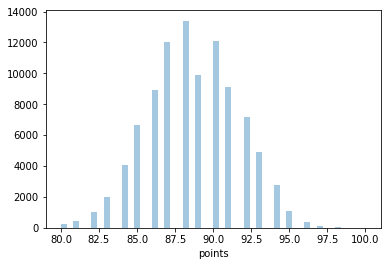

In [368]:
sns.distplot(df.points, kde=False)

In [369]:
def GoodRating(row):
    if row['points'] >= 92:
        val = 3
    elif row['points'] >= 86 and row['points'] < 92:
        val = 2
    else:
        val = 1
    return(val)
df['quality_level'] = df.apply(GoodRating, axis=1)
df = df.drop(['points'],1)
df.head()

,country,price,province,taster_name,quality_level
1,30,15.0,105,15,2
2,39,14.0,263,14,2
3,39,13.0,213,0,2
4,39,65.0,263,14,2
5,36,15.0,257,12,2


In [370]:
X1 = df.drop(["quality_level"], axis=1)
# Extract the target feature
y1 = df['quality_level']
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.2, random_state=42)

In [371]:
clf_dtc = DecisionTreeClassifier()
clf_dtc.fit(X_train1, y_train1)
y_pred_DecisionTreeClassifier= clf_dtc.predict(X_test1)
print_score(y_test1,y_pred_DecisionTreeClassifier)

Accuracy:  72.22942488202044
Precision:  70.3383949818951
Recall:  72.22942488202044
f1 Score:  69.57953785262121


In [372]:
clf4 = GaussianNB()
clf4.fit(X_train1, y_train1)
y_pred_GaussianNB = clf4.predict(X_test1)
print_score(y_test1,y_pred_GaussianNB)

Accuracy:  70.09282787947933
Precision:  67.5288801336047
Recall:  70.09282787947933
f1 Score:  63.17063393666075


In [373]:
clf5 = RandomForestClassifier()
clf5.fit(X_train1, y_train1)
y_pred_rabdom_for_test = clf5.predict(X_test1)
print_score(y_test1,y_pred_rabdom_for_test)

/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Accuracy:  72.53020795519369
Precision:  70.7182306855983
Recall:  72.53020795519369
f1 Score:  69.89039964820878


In [374]:
knn_3 = KNeighborsClassifier(3, weights='uniform', p=2, metric='euclidean')
knn_3.fit(X_train1, y_train1)
y_pred_KNeighborsClassifier_3 = knn_3.predict(X_test1)
print_score(y_test1,y_pred_KNeighborsClassifier_3)

Accuracy:  67.22501685422392
Precision:  65.59829553737438
Recall:  67.22501685422392
f1 Score:  66.19385007029605


In [375]:
knn_4 = KNeighborsClassifier(4, weights='uniform', p=2, metric='euclidean')
knn_4.fit(X_train1, y_train1)
y_pred_KNeighborsClassifier_4 = knn_4.predict(X_test1)
print_score(y_test1,y_pred_KNeighborsClassifier_4)

Accuracy:  67.37022247575585
Precision:  66.75668250164054
Recall:  67.37022247575585
f1 Score:  66.33154419972664


In [376]:
knn_2 = KNeighborsClassifier(2, weights='uniform', p=2, metric='euclidean')
knn_2.fit(X_train1, y_train1)
y_pred_KNeighborsClassifier_2 = knn_2.predict(X_test1)
print_score(y_test1,y_pred_KNeighborsClassifier_2)

Accuracy:  62.54732147487424
Precision:  64.53640109546345
Recall:  62.54732147487424
f1 Score:  62.34245331645082


In [377]:
knn_1 = KNeighborsClassifier(1, weights='uniform', p=2, metric='euclidean')
knn_1.fit(X_train1, y_train1)
y_pred_KNeighborsClassifier_1 = knn_1.predict(X_test1)
print_score(y_test1,y_pred_KNeighborsClassifier_1)

Accuracy:  62.568065135093086
Precision:  62.76398960297422
Recall:  62.568065135093086
f1 Score:  62.663491631208025


Random forest classifier has the best performance. Random forest classifier contains a lot of decision tree, which make it a better choice to 
avoid overfitting. It also has advantages in multiple features dataset.

In [330]:
def print_score(y_true,y_pred):
    accuracy_dt =  accuracy_score(y_true,y_pred)*100
    print('Accuracy: ', accuracy_dt)
    precision_dt = precision_score(y_true,y_pred,average='weighted')*100
    print('Precision: ', precision_dt)
    recall_dt = recall_score(y_true,y_pred,average='weighted')*100
    print('Recall: ', recall_dt)
    f1_dt = f1_score(y_true,y_pred,average='weighted')*100
    print('f1 Score: ', f1_dt)

### Now we will be using another model - Use the description information to predict the quality of the wine

#### 1. Description Vectorization

In [379]:
parsed_df = init_df[['description','points']]
parsed_df.head()

,description,points
0,"Aromas include tropical fruit, broom, brimston...",87
1,"This is ripe and fruity, a wine that is smooth...",87
2,"Tart and snappy, the flavors of lime flesh and...",87
3,"Pineapple rind, lemon pith and orange blossom ...",87
4,"Much like the regular bottling from 2012, this...",87


In [380]:
parsed_df = parsed_df.assign(description_length = parsed_df['description'].apply(len))
parsed_df.head()

,description,points,description_length
0,"Aromas include tropical fruit, broom, brimston...",87,172
1,"This is ripe and fruity, a wine that is smooth...",87,227
2,"Tart and snappy, the flavors of lime flesh and...",87,186
3,"Pineapple rind, lemon pith and orange blossom ...",87,199
4,"Much like the regular bottling from 2012, this...",87,249


In [381]:
parsed_df['quality_level'] = parsed_df.apply(GoodRating, axis=1)
parsed_df = parsed_df.drop(['points'],1)
parsed_df.head()

,description,description_length,quality_level
0,"Aromas include tropical fruit, broom, brimston...",172,2
1,"This is ripe and fruity, a wine that is smooth...",227,2
2,"Tart and snappy, the flavors of lime flesh and...",186,2
3,"Pineapple rind, lemon pith and orange blossom ...",199,2
4,"Much like the regular bottling from 2012, this...",249,2


In [386]:
X = parsed_df['description']
y = parsed_df['quality_level']

vectorizer = CountVectorizer()
vectorizer.fit(X)
X = vectorizer.transform(X)

### Train and test data

In [390]:
# Training the model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

# Testing the model
predictions = rfc.predict(X_test)
print(classification_report(y_test, predictions))

/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


              precision    recall  f1-score   support

           1       0.72      0.40      0.52      2200
           2       0.72      0.95      0.82      8463
           3       0.84      0.20      0.32      2335

   micro avg       0.72      0.72      0.72     12998
   macro avg       0.76      0.52      0.55     12998
weighted avg       0.74      0.72      0.68     12998



In [389]:
# Training the model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
rfc = DecisionTreeClassifier()
rfc.fit(X_train, y_train)

# Testing the model
predictions = rfc.predict(X_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           1       0.50      0.46      0.48      4436
           2       0.75      0.79      0.77     17016
           3       0.52      0.45      0.48      4543

   micro avg       0.67      0.67      0.67     25995
   macro avg       0.59      0.57      0.58     25995
weighted avg       0.67      0.67      0.67     25995



In [392]:
# Training the model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
rfc = KNeighborsClassifier(3, weights='uniform', p=2, metric='euclidean')
rfc.fit(X_train, y_train)

# Testing the model
predictions = rfc.predict(X_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           1       0.29      0.77      0.42      2200
           2       0.71      0.58      0.64      8463
           3       0.75      0.06      0.11      2335

   micro avg       0.52      0.52      0.52     12998
   macro avg       0.58      0.47      0.39     12998
weighted avg       0.65      0.52      0.50     12998



In [393]:
# Training the model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
rfc = KNeighborsClassifier(4, weights='uniform', p=2, metric='euclidean')
rfc.fit(X_train, y_train)

# Testing the model
predictions = rfc.predict(X_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           1       0.27      0.87      0.41      2200
           2       0.70      0.48      0.57      8463
           3       0.79      0.03      0.07      2335

   micro avg       0.46      0.46      0.46     12998
   macro avg       0.58      0.46      0.35     12998
weighted avg       0.64      0.46      0.45     12998



Result With CountVectorizer and RandomForestClassifier: 74% precision

### 2. Use TfidfVectorizer

TfidfVectorizer has some advantages over the simpler CountVectorizer.

CountVectorizer just counts the word frequencies. That's all.

With TfidfVectorizer the value increases proportionally to count, but is offset by the frequency of the word in the total corpus. This is called the IDF (inverse document frequency part). This allow the Vectorizer to adjust with frequent words like "the", "a" etc...

In [396]:
X = parsed_df['description']
y = parsed_df['quality_level']

# Vectorizing model
vectorizer = TfidfVectorizer()
vectorizer.fit(X)
X = vectorizer.transform(X)

In [397]:
# Training model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

# Testing model
predictions = rfc.predict(X_test)
print(classification_report(y_test, predictions))

/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


              precision    recall  f1-score   support

           1       0.75      0.40      0.52      2200
           2       0.72      0.95      0.82      8463
           3       0.81      0.23      0.36      2335

   micro avg       0.73      0.73      0.73     12998
   macro avg       0.76      0.53      0.57     12998
weighted avg       0.74      0.73      0.69     12998



In [398]:
# Training the model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
rfc = DecisionTreeClassifier()
rfc.fit(X_train, y_train)

# Testing the model
predictions = rfc.predict(X_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           1       0.50      0.46      0.48      2200
           2       0.74      0.77      0.75      8463
           3       0.50      0.47      0.49      2335

   micro avg       0.66      0.66      0.66     12998
   macro avg       0.58      0.57      0.57     12998
weighted avg       0.66      0.66      0.66     12998



In [399]:
# Training the model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
rfc = KNeighborsClassifier(3, weights='uniform', p=2, metric='euclidean')
rfc.fit(X_train, y_train)

# Testing the model
predictions = rfc.predict(X_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           1       0.48      0.57      0.52      2200
           2       0.74      0.81      0.78      8463
           3       0.62      0.30      0.40      2335

   micro avg       0.68      0.68      0.68     12998
   macro avg       0.62      0.56      0.57     12998
weighted avg       0.68      0.68      0.67     12998



In [400]:
# Training the model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
rfc = KNeighborsClassifier(4, weights='uniform', p=2, metric='euclidean')
rfc.fit(X_train, y_train)

# Testing the model
predictions = rfc.predict(X_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           1       0.49      0.67      0.57      2200
           2       0.73      0.81      0.77      8463
           3       0.67      0.20      0.31      2335

   micro avg       0.67      0.67      0.67     12998
   macro avg       0.63      0.56      0.55     12998
weighted avg       0.68      0.67      0.65     12998



In [405]:
The performance does not have significantly improvement. Maybe because the data set is not large enough.

SyntaxError: invalid syntax (<ipython-input-405-63b8981084d6>, line 1)

### 3. Improve the model by cleaning the dataset

In [341]:
import re
description =  re.sub('[^a-zA-Z]',' ',parsed_df['description'][0]).lower()
description

'aromas include tropical fruit  broom  brimstone and dried herb  the palate isn t overly expressive  offering unripened apple  citrus and dried sage alongside brisk acidity '

In [342]:
#convert string to a list of words
description_words = description.split() 
#iterate over each word and include it if it is not stopword 
description_words = [word for word in description_words if not word in stopwords.words('english')]

description_words

['aromas',
 'include',
 'tropical',
 'fruit',
 'broom',
 'brimstone',
 'dried',
 'herb',
 'palate',
 'overly',
 'expressive',
 'offering',
 'unripened',
 'apple',
 'citrus',
 'dried',
 'sage',
 'alongside',
 'brisk',
 'acidity']

In [343]:
ps = PorterStemmer()
description_words=[ps.stem(word) for word in description_words]
description_words

['aroma',
 'includ',
 'tropic',
 'fruit',
 'broom',
 'brimston',
 'dri',
 'herb',
 'palat',
 'overli',
 'express',
 'offer',
 'unripen',
 'appl',
 'citru',
 'dri',
 'sage',
 'alongsid',
 'brisk',
 'acid']

In [272]:
parsed_df['description'][0]=' '.join(description_words)
parsed_df['description'][0]

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


'aroma includ tropic fruit broom brimston dri herb palat overli express offer unripen appl citru dri sage alongsid brisk acid'

Two apporach to improve the model:
    1. remove the irrelavent numbers and symbols
    2. remove the stopwords like 'a', 'the', 'is', etc...

In [344]:
stopword_list = stopwords.words('english')
ps = PorterStemmer()
for i in range(1,len(parsed_df['description'])):
    description = re.sub('[^a-zA-Z]',' ',parsed_df['description'][i])
    description = description.lower()
    description_words = description.split()
    description_words = [word for word in description_words if not word in stopword_list]
    description_words = [ps.stem(word) for word in description_words]
    parsed_df['description'][i] = ' '.join(description_words)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [345]:
parsed_df.head()

,description,description_length,quality_level
0,"Aromas include tropical fruit, broom, brimston...",172,2
1,ripe fruiti wine smooth still structur firm ta...,227,2
2,tart snappi flavor lime flesh rind domin green...,186,2
3,pineappl rind lemon pith orang blossom start a...,199,2
4,much like regular bottl come across rather rou...,249,2


In [401]:
X = parsed_df['description']
y = parsed_df['quality_level']

vectorizer = CountVectorizer()
vectorizer.fit(X)
X = vectorizer.transform(X)

In [402]:
# Training the model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

# Testing the model
predictions = rfc.predict(X_test)
print(classification_report(y_test, predictions))

/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


              precision    recall  f1-score   support

           1       0.72      0.39      0.51      2200
           2       0.72      0.95      0.82      8463
           3       0.83      0.20      0.33      2335

   micro avg       0.72      0.72      0.72     12998
   macro avg       0.76      0.51      0.55     12998
weighted avg       0.74      0.72      0.68     12998



In [403]:
X = parsed_df['description']
y = parsed_df['quality_level']

# Vectorizing model
vectorizer = TfidfVectorizer()
vectorizer.fit(X)
X = vectorizer.transform(X)

In [404]:
# Training model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

# Testing model
predictions = rfc.predict(X_test)
print(classification_report(y_test, predictions))

/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


              precision    recall  f1-score   support

           1       0.74      0.37      0.49      2200
           2       0.72      0.95      0.82      8463
           3       0.80      0.25      0.38      2335

   micro avg       0.73      0.73      0.73     12998
   macro avg       0.76      0.52      0.56     12998
weighted avg       0.74      0.73      0.68     12998

